#PERKENALAN

Muhammat Rayyan Nasution_PYTN-KS08-015 &
Muchtar Ali Yahya_PYTN-KS08-023

Rain in Australia
Dataset ini berisi observasi cuaca dari berbagai lokasi selama 10 tahun. Dalam dataset ini, kita diminta untuk memprediksi hujan dihari esok dengan ,elatih model klasifikasi pada variabel target.

Variabel 'RainTomorrow' menjadi variabel target untuk memprediksi. Artinya, apakah hari esok hujan atau tidak?. Kolom berisi 'Yes' artinya besok hujan dan 'No' berarti tidak hujan.

dataset akan diprediksi dengan menggunakan SVM(Support Vector Machine) dan Logistic Regression



# IMPORT PUSTAKA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#LOAD DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv('drive/MyDrive/H8/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
data.shape # Melihat jumlah baris dan kolom dataset

(145460, 23)

In [5]:
data.columns # Melihat nama variabel keseluruhan Dataset

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
data.describe() # Melihat ringkasan dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
data.info() # Melihat total data non missing value dan tipe data pada dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#DATA CLEANING

Dalam membersihkan data, kita bisa mengisi missing value, menghapus baris yang missing, atau menambah dan mengurangi column yang tidak digunakan

In [8]:
data.isna().sum() #Mengecek missing value pada dataset

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

nama_kolom = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
imputer = IterativeImputer(random_state = 0)

for i in range(len(nama_kolom)):
  imputer.fit(data[nama_kolom])
  data[nama_kolom] = imputer.transform(data[nama_kolom])

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [10]:
data.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         55888
Cloud3pm         59358
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
from scipy.stats import mode
# Mengisi missing value jika terdapat missing
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0]) 
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0]) 
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0]) 
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].mode()[0]) 
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Cloud3pm'].mode()[0]) 
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0]) 
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0]) 
data.isnull().sum() # Untuk mengecek kembali

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [12]:
data.shape

(145460, 23)

Dalam mengatasi missing value yang terdapat dalam dataset, kami memilih mengisi missing value daripada menghapus baris dataset yang terdapat missing value, karena menghapus baris menggunakan 'dropna' memiliki kelemahan yaitu data akan menjadi lebih sedikit atau berkurang dan kemungkinan data yang dihapus memiliki informasi yang penting.

##EXPLORASI DATA

##DATA PREPROCESSING

In [13]:
from sklearn.preprocessing import LabelEncoder

labelenc = LabelEncoder()
labelenc.fit_transform(data['RainTomorrow'])

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
set(data['RainTomorrow'])

{'No', 'Yes'}

In [15]:
data = data.drop('Date',1)

<ipython-input-15-0bfddd2d5323>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('Date',1)


In [17]:
data.drop(['Temp9am','WindSpeed3pm','WindSpeed9am','MinTemp'], axis = 1, inplace = True)
data.head(5)

,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,Albury,22.9,0.6,6.227472,9.440437,W,44.0,W,WNW,71.0,22.0,1007.7,1007.1,8.0,7.0,21.8,No,No
1,Albury,25.1,0.0,6.265867,10.892394,WNW,44.0,NNW,WSW,44.0,25.0,1010.6,1007.8,7.0,7.0,24.3,No,No
2,Albury,25.7,0.0,8.535921,10.712319,WSW,46.0,W,WSW,38.0,30.0,1007.6,1008.7,7.0,2.0,23.2,No,No
3,Albury,28.0,0.0,6.835780,11.625936,NE,24.0,SE,E,45.0,16.0,1017.6,1012.8,7.0,7.0,26.5,No,No
4,Albury,32.3,1.0,7.501359,8.766619,W,41.0,ENE,NW,82.0,33.0,1010.8,1006.0,7.0,8.0,29.7,No,No


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['RainToday'] = encoder.fit_transform(data['RainToday'])
data['RainTomorrow'] = encoder.fit_transform(data['RainTomorrow'])
data['Location'] = encoder.fit_transform(data['Location'])
data['WindGustDir'] = encoder.fit_transform(data['WindGustDir'])
data['WindDir9am'] = encoder.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = encoder.fit_transform(data['WindDir3pm'])

In [19]:
set(data['RainTomorrow'])

{0, 1}

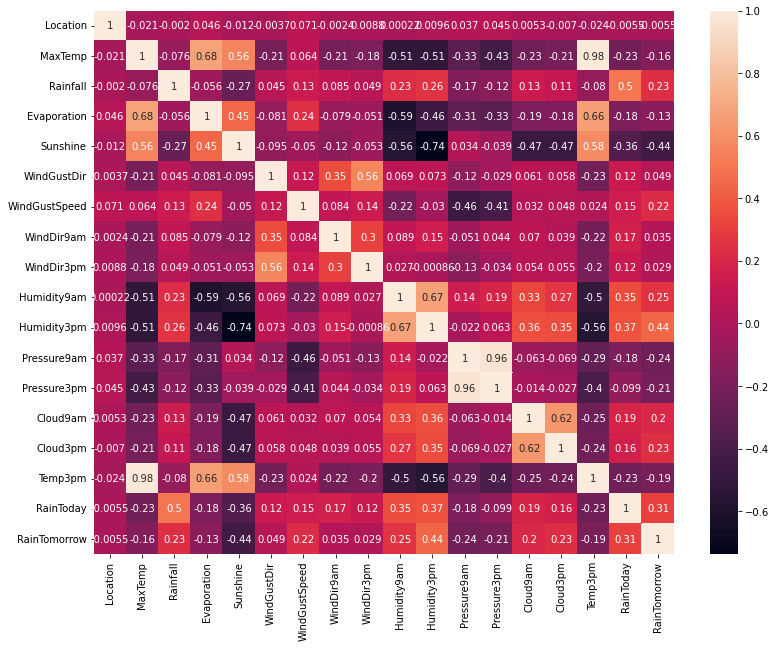

In [20]:
import seaborn as sns
plt.figure(figsize = (13,10))
sns.heatmap(data.corr(),annot = True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustDir    145460 non-null  int64  
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  int64  
 8   WindDir3pm     145460 non-null  int64  
 9   Humidity9am    145460 non-null  float64
 10  Humidity3pm    145460 non-null  float64
 11  Pressure9am    145460 non-null  float64
 12  Pressure3pm    145460 non-null  float64
 13  Cloud9am       145460 non-null  float64
 14  Cloud3pm       145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  int64  
 17  RainTomorrow   145460 non-nul

Memilih target untuk diprediksi (Prediction Target)

In [22]:
data.head(20)

,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,2,22.9,0.600000,6.227472,9.440437,13,44.000000,13,14,71.0,22.0,1007.7,1007.1,8.0,7.0,21.8,0,0
1,2,25.1,0.000000,6.265867,10.892394,14,44.000000,6,15,44.0,25.0,1010.6,1007.8,7.0,7.0,24.3,0,0
2,2,25.7,0.000000,8.535921,10.712319,15,46.000000,13,15,38.0,30.0,1007.6,1008.7,7.0,2.0,23.2,0,0
3,2,28.0,0.000000,6.835780,11.625936,4,24.000000,9,0,45.0,16.0,1017.6,1012.8,7.0,7.0,26.5,0,0
4,2,32.3,1.000000,7.501359,8.766619,13,41.000000,1,7,82.0,33.0,1010.8,1006.0,7.0,8.0,29.7,0,0
5,2,29.7,0.200000,7.986718,10.175333,14,56.000000,13,13,55.0,23.0,1009.2,1005.4,7.0,7.0,28.9,0,0
6,2,25.0,0.000000,7.991340,9.849329,13,50.000000,12,13,49.0,19.0,1009.6,1008.2,1.0,7.0,24.6,0,0
7,2,26.7,0.000000,6.609503,11.441084,13,35.000000,10,13,48.0,19.0,1013.4,1010.1,7.0,7.0,25.5,0,0
8,2,31.9,0.000000,9.034146,11.293704,6,80.000000,9,7,42.0,9.0,1008.9,1003.6,7.0,7.0,30.2,0,1
9,2,30.1,1.400000,7.710597,10.784060,13,28.000000,8,10,58.0,27.0,1007.0,1005.7,7.0,7.0,28.2,1,0


In [23]:
y = data['RainTomorrow']
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64

Feature Selection

In [24]:
fitur = ['Location','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Cloud9am','RainToday']
x = data[fitur]
x

,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Cloud9am,RainToday
0,2,22.900000,0.6,6.227472,9.440437,13,44.000000,13,14,71.0,22.0,1007.7,1007.1,7.0,8.0,0
1,2,25.100000,0.0,6.265867,10.892394,14,44.000000,6,15,44.0,25.0,1010.6,1007.8,7.0,7.0,0
2,2,25.700000,0.0,8.535921,10.712319,15,46.000000,13,15,38.0,30.0,1007.6,1008.7,2.0,7.0,0
3,2,28.000000,0.0,6.835780,11.625936,4,24.000000,9,0,45.0,16.0,1017.6,1012.8,7.0,7.0,0
4,2,32.300000,1.0,7.501359,8.766619,13,41.000000,1,7,82.0,33.0,1010.8,1006.0,8.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,23.400000,0.0,5.337145,10.595664,0,31.000000,9,1,51.0,24.0,1024.6,1020.3,7.0,7.0,0
145456,41,25.300000,0.0,5.387204,11.367796,6,22.000000,9,3,56.0,21.0,1023.5,1019.1,7.0,7.0,0
145457,41,26.900000,0.0,6.261369,10.494935,3,37.000000,9,14,53.0,24.0,1021.0,1016.8,7.0,7.0,0
145458,41,27.000000,0.0,6.681114,10.791906,9,28.000000,10,3,51.0,24.0,1019.4,1016.5,2.0,3.0,0


#MODELLING

Model yang digunakan adalah SVM dan Logistic Regression

In [25]:
# Separating attributes
X = data[data.columns[:17]]
# Separating label
y = data['RainTomorrow']

In [26]:
from sklearn.preprocessing import StandardScaler
# Call StandardScaler
scaler = StandardScaler()
# Standardization of dataset values
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-1.53166617 -0.04526309 -0.21164047 ...  0.60794072  0.01314928
  -0.52979545]
 [-1.53166617  0.26470717 -0.28311501 ...  0.60794072  0.37248722
  -0.52979545]
 [-1.53166617  0.34924452 -0.28311501 ... -1.45435072  0.21437852
  -0.52979545]
 ...
 [ 1.20928479  0.51831921 -0.28311501 ...  0.60794072  0.63121054
  -0.52979545]
 [ 1.20928479  0.53240877 -0.28311501 ... -1.45435072  0.61683702
  -0.52979545]
 [ 1.20928479 -0.20886294 -0.28311501 ...  1.02039901 -0.11621238
  -0.52979545]]


#EVALUATION

In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Separate training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# Import SVM classifier
from sklearn.svm import SVC
# Create SVC object and call fit function to train model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [29]:
# Show accuracy score
clf.score(X_test, y_test)

0.8510895379359193

In [30]:
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

# spliting daa
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify=y)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
model_lr = LogisticRegression()
cv_score = cross_val_score(model_lr, X,y, scoring='roc_auc', cv=5)
cv_score.mean()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.8526336229173713

#EVALUATION

In [32]:
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
confusion_matrix(y_test, y_pred, labels=[1,2])

array([[3702,    0],
       [   0,    0]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     28396
           1       0.70      0.46      0.56      7969

    accuracy                           0.84     36365
   macro avg       0.78      0.70      0.73     36365
weighted avg       0.83      0.84      0.83     36365

